In [ ]:
# note, there are placeholders throughout the code, that you must properly insert
# for entire script to work

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np

In [19]:
df_raw = pd.read_csv("../assets/admissions_test.csv")
df = df_raw.dropna() # drop any rows, with a null value for any column
print df.dtypes # look carefully at what columns are present in this dataFrame
df.count()
# df.columns
# pd.crosstab(df['admit'],df['prestige'])

admit         int64
prestige    float64
dtype: object


admit       192
prestige    192
dtype: int64

In [8]:
df_no_admit = df[df['admit'] == 0]
rows_no_admit, cols_no_admit = df_no_admit.shape
print rows_no_admit

138


In [9]:
df_admit = df[df['admit'] == 1]
rows_admit, cols_admit = df_admit.shape
print rows_admit

54


In [11]:
print (15./rows_admit)*100

27.7777777778


In [10]:
print (12./rows_no_admit)*100

8.69565217391


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118946d10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1189cb850>]], dtype=object)

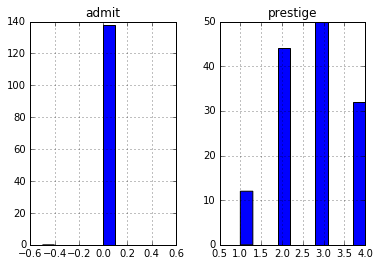

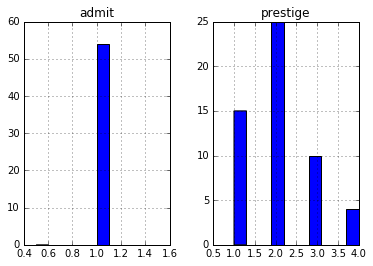

In [15]:
df_no_admit.hist()
df_admit.hist()

In [17]:
#create a frequency table using cross tab from pd, what columns do we want to group by here?
# group_column_1 = ?
# group_column_2 = ? 

pd.crosstab(df['admit'],df['prestige'])

prestige,1.0,2.0,3.0,4.0
admit,,,,
0,12,44,50,32
1,15,25,10,4


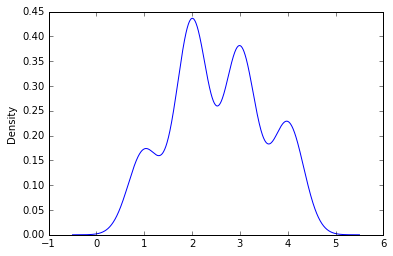

In [23]:
df.prestige.plot(kind = 'density')

In [24]:
df.prestige.mean()

2.546875

In [25]:
df.prestige.std()

0.9533026774138411

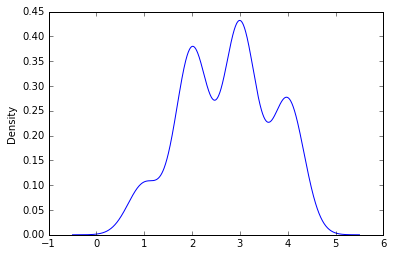

In [27]:
df_no_admit.prestige.plot(kind = 'density')

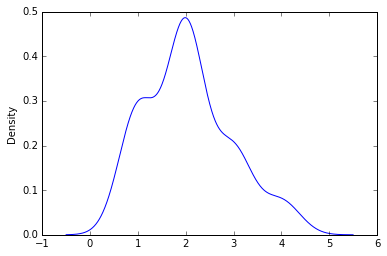

In [28]:
df_admit.prestige.plot(kind = 'density')

In [36]:
# create dummy variables using pd.create_dummies
# When your variables are categorical, you should create a dummy varaible. Subjectivity is key.
# When you can quantify variables, ordinal variables, you might not need to have dummy vars.
# dummy_column = ?
# prefix_for_dummy_col = ?

dummy_ranks = pd.get_dummies(df['prestige'], prefix='prestige')
print dummy_ranks.head(4)

# prestige = [3,3,1,4]



   prestige_1.0  prestige_2.0  prestige_3.0  prestige_4.0
0             0             0             1             0
1             0             0             1             0
2             1             0             0             0
3             0             0             0             1


192

In [20]:
cols_to_keep = [] # insert column(s) that you want to keep in your dataFrame here before the join
df_ready = df[cols_to_keep].join(dummy_ranks)

In [ ]:
# 3.1 Use the cross tab above to calculate the odds of 
# being admitted to grad school if you attended a #1 ranked college
# group_by_column_1 = ?
# group_by_column_2 = ?

pd.crosstab(df_ready['group_by_column_1'],df_ready['group_by_column_2'])

In [24]:
# if you are using Logit() from statsmodel.linear_model, you must specify y-intercept (constant)
df_ready['intercept'] = 1

In [ ]:
# make a new dataFrame with only your predictors, 
#in our case just dummy variables, minus baseline prestige_4
predictor_cols = [] # insert final columns as string delimtied by comma that you want to keep in here
df_predictors = df_ready[predictor_cols]
df_predictors.head(2)

In [ ]:
# use sm.Logit() from statsmodels.api to build logit model
# rmr class column is what we are trying to 'predict'
# your_class_column = ?

logit = sm.Logit(df_ready['your_class_column'], df_predictors)
results = logit.fit()

In [ ]:
# get model coefficients, Confidence Intervals for Predictors etc, via the .summary method
# on a Logit model
results.summary()

In [ ]:
model_coef = results.params # to get model coefficients
print model_coef

In [ ]:
# to calculate odds of coefficients after model, rmr to use np.exp(coefficients)
print np.exp(model_coef)

In [60]:
# creating fake data for predictions
prestige_test_set = np.random.randint(1,4,50) # give me 50 numbes between 0 and 4 inclusive in list
df_test = pd.DataFrame({'prestige':prestige_test_set, 'intercept': 1}) # make dataFrame

In [ ]:
df_test.describe()

In [ ]:
# dummy_column = ? 
# dummy_column_prefix = ? 

dummy_ranks_test = pd.get_dummies(df_test['dummy_column'], prefix='dummy_column_prefix') # create dummies for test df
dummy_ranks_test.columns

In [ ]:
test_cols_to_keep = [] #insert string of columns, comma delimited, that you want to keep as predictors 
df_for_pred = df_test.join(dummy_ranks_test)[test_cols_to_keep] #join then select only pred cols
df_for_pred.head(2)

In [ ]:
df_for_pred['admit_pred'] = results.predict(df_for_pred) # new col with predicted admit based on model

print df_for_pred.tail()
len(df_for_pred)

In [ ]:
# note how a probability is always returned in admit_pred (Logistic Regression)